In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [37]:
train.head()

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Af04604195,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
1,Af04794049,0,2000,0,54.8,321.0,88,0.01,10.424960,62.0,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
2,Af07527693,0,2006,0,57.3,295.0,84,0.03,17.171518,64.0,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
3,Af11267444,0,2010,0,58.8,279.0,74,0.01,79.679367,66.0,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
4,Af12688448,0,2005,0,57.3,291.0,85,0.02,1.388648,66.0,...,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9


In [4]:
test.head()

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sy75324907,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,Cr10129453,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,...,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,Mo67025598,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,Ba38246112,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,...,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
4,Ke57254548,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,...,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


In [6]:
train.shape, test.shape

((2350, 23), (588, 22))

In [7]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2350.000000,2350.000000,2342.000000,2350.000000,2192.000000,2350.000000,1911.000000,2350.000000,2323.000000,2350.000000,2336.000000,2165.000000,2336.000000,2350.000000,2005.000000,1.834000e+03,2323.000000,2323.000000,2219.000000,2221.000000
mean,2007.537447,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,4.611986,9.573065,125.273598,111.836006,4.034828,1952.616462,24.821252,11589.618520,20.073857,152.939537,23.363327,2.509597,23.793441,5.266324,14189.942344,5.480387e+07,4.403585,4.482891,0.207573,3.346762
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.300000,74.000000,0.000000,0.850000,5.491010,77.000000,0.000000,19.400000,0.000000,78.000000,4.260000,78.000000,0.100000,462.517913,1.943552e+05,1.600000,1.500000,0.497000,10.100000
50%,2008.000000,72.200000,144.000000,3.000000,3.760000,65.611455,92.000000,16.000000,43.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1774.929100,1.416448e+06,3.300000,3.300000,0.682000,12.400000
75%,2012.000000,75.700000,227.750000,20.750000,7.622500,441.534144,97.000000,356.250000,56.200000,26.000000,97.000000,7.500000,97.000000,0.800000,5859.915622,7.442611e+06,7.100000,7.100000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life expectancy                  2350 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2192 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      1911 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2323 non-null   float64
 12  under-five deaths   

In [10]:
train["ID"].nuniqueque()

2350

In [11]:
train["Country"].nunique()

191

In [12]:
train["Status"].nunique()

2

<Axes: xlabel='Status', ylabel='count'>

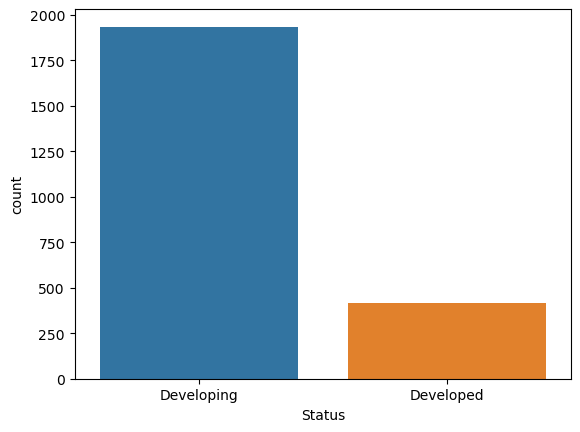

In [14]:
sns.countplot(x = train["Status"])

In [17]:
train.isna().sum()

ID                                   0
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            158
percentage expenditure               0
Hepatitis B                        439
Measles                              0
BMI                                 27
under-five deaths                    0
Polio                               14
Total expenditure                  185
Diphtheria                          14
HIV/AIDS                             0
GDP                                345
Population                         516
thinness  1-19 years                27
thinness 5-9 years                  27
Income composition of resources    131
Schooling                          129
dtype: int64

In [18]:
train["Adult Mortality"] = train["Adult Mortality"].fillna(train["Adult Mortality"].mean())
test["Adult Mortality"] = test["Adult Mortality"].fillna(test["Adult Mortality"].mean())

In [20]:
train = train.ffill()
test = test.ffill()

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   int32  
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life expectancy                  2350 non-null   float64
 5   Adult Mortality                  2350 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2350 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      2350 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2350 non-null   float64
 12  under-five deaths   

In [30]:
train["Country"].unique()

array([  0,   1,   2,   4,   3,   5,   6,   7,   8,   9,  11,  12,  10,
        13,  17,  14,  15,  16,  18,  21,  20,  19,  23,  22,  24,  26,
        25,  27,  29,  28,  30,  31,  34,  33,  32,  39,  36,  35,  37,
        38,  40,  41,  42,  43,  44,  46,  47,  45,  48,  50,  49,  51,
        52,  53,  54,  55,  56,  57,  59,  58,  60,  62,  61,  63,  64,
        65,  66,  67,  71,  69,  68,  70,  72,  73,  74,  75,  77,  76,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        92,  91,  94,  93,  95,  97,  96,  98, 106, 103, 107, 100, 105,
        99, 104, 101, 102, 108, 109, 113, 114, 111, 112, 110, 115, 116,
       117, 118, 119, 120, 123, 124, 122, 121, 125, 126, 127, 130, 131,
       129, 128, 132, 133, 135, 134, 136, 138, 137, 139, 140, 141, 145,
       146, 144, 143, 147, 142, 149, 150, 148, 151, 152, 153, 154, 155,
       158, 156, 157, 159, 160, 161, 162, 164, 163, 165, 166, 167, 169,
       168, 170, 172, 171, 173, 174, 176, 175, 177, 178, 179, 18

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_country =  encoder.fit_transform(train["Country"])

In [28]:
train["Country"] = train_country

In [39]:
test.head()

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sy75324907,155,2006,0,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,Cr10129453,37,2006,1,113.0,0,11.83,1555.651986,83.0,1,...,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,Mo67025598,105,2007,0,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,Ba38246112,11,2014,0,7.0,0,1.57,367.255674,98.0,46,...,98.0,4.98,98.0,0.1,24983.379200,615875.0,6.1,6.0,0.820,14.5
4,Ke57254548,82,2000,0,428.0,77,1.51,0.681686,98.0,21002,...,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


In [32]:
test["Country"] = encoder.fit_transform(test["Country"])

In [36]:
train["Status"]=  pd.get_dummies(train["Status"])["Developed"]

In [38]:
test["Status"]=  pd.get_dummies(test["Status"])["Developed"]

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   int32  
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   uint8  
 4   Life expectancy                  2350 non-null   float64
 5   Adult Mortality                  2350 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2350 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      2350 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2350 non-null   float64
 12  under-five deaths   

In [41]:
train.corr()

C:\Users\natha\AppData\Local\Temp\ipykernel_9984\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,-0.007372,0.026712,-0.018181,0.026330,-0.027653,-0.047204,-0.039731,-0.003611,-0.018313,...,0.025683,0.052432,0.005315,0.084778,-0.003068,-0.061210,0.012858,0.027369,-0.018724,-0.038803
Year,-0.007372,1.000000,-0.008722,0.173728,-0.080232,-0.030257,-0.056535,0.033890,0.080184,-0.072859,...,0.089466,0.072399,0.132004,-0.138462,0.102090,0.020845,-0.037578,-0.041140,0.226904,0.203128
Status,0.026712,-0.008722,1.000000,0.479646,-0.315553,-0.113039,0.587160,0.441631,0.114691,-0.071116,...,0.221570,0.287363,0.216597,-0.148388,0.330009,-0.048962,-0.367295,-0.367231,0.463466,0.481248
Life expectancy,-0.018181,0.173728,0.479646,1.000000,-0.701448,-0.202242,0.384936,0.373869,0.228612,-0.164493,...,0.453543,0.197206,0.466992,-0.556794,0.361353,-0.004894,-0.468917,-0.469017,0.678129,0.693111
Adult Mortality,0.026330,-0.080232,-0.315553,-0.701448,1.000000,0.088420,-0.186053,-0.243657,-0.157408,0.031427,...,-0.280345,-0.105606,-0.270389,0.523480,-0.237137,-0.024126,0.307501,0.320315,-0.427691,-0.426951
infant deaths,-0.027653,-0.030257,-0.113039,-0.202242,0.088420,1.000000,-0.109421,-0.085166,-0.162897,0.491278,...,-0.182983,-0.129158,-0.180328,0.024580,-0.077408,0.454543,0.465103,0.472186,-0.138075,-0.177175
Alcohol,-0.047204,-0.056535,0.587160,0.384936,-0.186053,-0.109421,1.000000,0.317860,0.083956,-0.043953,...,0.210203,0.291785,0.209119,-0.045303,0.275584,-0.032614,-0.408903,-0.395499,0.439900,0.494993
percentage expenditure,-0.039731,0.033890,0.441631,0.373869,-0.243657,-0.085166,0.317860,1.000000,0.007703,-0.050703,...,0.138758,0.163807,0.136352,-0.096577,0.691487,-0.010219,-0.244642,-0.247191,0.347377,0.367678
Hepatitis B,-0.003611,0.080184,0.114691,0.228612,-0.157408,-0.162897,0.083956,0.007703,1.000000,-0.098120,...,0.429847,0.090733,0.510654,-0.105678,0.077423,-0.068969,-0.115104,-0.117753,0.159336,0.198724
Measles,-0.018313,-0.072859,-0.071116,-0.164493,0.031427,0.491278,-0.043953,-0.050703,-0.098120,1.000000,...,-0.146290,-0.103896,-0.146309,0.028764,0.022239,0.206392,0.222143,0.219918,-0.091816,-0.079453


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               588 non-null    object 
 1   Country                          588 non-null    int32  
 2   Year                             588 non-null    int64  
 3   Status                           588 non-null    uint8  
 4   Adult Mortality                  588 non-null    float64
 5   infant deaths                    588 non-null    int64  
 6   Alcohol                          588 non-null    float64
 7   percentage expenditure           588 non-null    float64
 8   Hepatitis B                      588 non-null    float64
 9   Measles                          588 non-null    int64  
 10  BMI                              588 non-null    float64
 11  under-five deaths                588 non-null    int64  
 12  Polio                 

In [45]:
from sklearn.model_selection import train_test_split

X = train.drop(['ID', 'Life expectancy'] , axis = 1)
y = train["Life expectancy"]

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2023)

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [48]:
reg.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = reg.predict(X_train)

In [50]:
y_p_test = reg.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(y_train, y_pred)

17.16315317747792

In [53]:
mean_squared_error(y_test, y_p_test)

18.55534856190623

In [54]:
sample = pd.read_csv("sample_submission.csv")

In [55]:
sample.head()

,ID,Life expectancy
0,Sy75324907,0
1,Cr10129453,0
2,Mo67025598,0
3,Ba38246112,0
4,Ke57254548,0


In [57]:
out = reg.predict(test.drop('ID', axis= 1))

In [58]:
sample["Life expectancy"] = out

In [59]:
sample.head()

,ID,Life expectancy
0,Sy75324907,67.401367
1,Cr10129453,77.159402
2,Mo67025598,74.819243
3,Ba38246112,77.107574
4,Ke57254548,46.994564


In [61]:
sample.to_csv("submission.csv", index=False)